In [1]:
!nvidia-smi

Sun Oct 29 17:49:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 511.69       Driver Version: 511.69       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:02:00.0 Off |                  N/A |
| N/A   50C    P0    N/A /  N/A |      0MiB /  2048MiB |      2%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# !pip install roboflow

In [3]:
# !pip install ultralytics==8.0.20

In [4]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20  Python-3.9.7 torch-2.1.0+cpu CPU
Setup complete  (8 CPUs, 7.9 GB RAM, 357.0/476.0 GB disk)


In [5]:
import os
import pandas as pd
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow


HOME = os.getcwd()+''
train_50_epoch = r"\training_outputs\50_epoch"
train_100_epoch = r"\training_outputs\100_epoch"
kaggle_output_folder = r"\staff_attire_detect_output\kaggle\working"  # unzip the zip folder and set to the output folder path
print(HOME)
print(HOME + train_50_epoch + kaggle_output_folder)
print(HOME + train_100_epoch + kaggle_output_folder)

C:\Users\user10\Desktop\Staff_Attire_Detection
C:\Users\user10\Desktop\Staff_Attire_Detection\training_outputs\50_epoch\staff_attire_detect_output\kaggle\working
C:\Users\user10\Desktop\Staff_Attire_Detection\training_outputs\100_epoch\staff_attire_detect_output\kaggle\working


- Get dataset

In [6]:
## Run below once to get your dataset in local PC

datasets_path = HOME + '\datasets'
!mkdir {datasets_path}
%cd {datasets_path}


rf = Roboflow(api_key="VgT3DjGuCJJ44HONUfRE")
project = rf.workspace("qi-ming").project("staff-attire-identification")
dataset = project.version(4).download("yolov8")

C:\Users\user10\Desktop\Staff_Attire_Detection\datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Staff-Attire-Identification-4 in yolov8:: 100%|█| 1668/1668 [00:01<00:00, 1271.32it/s


- Get trained model

In [7]:
model_50ep_path = HOME + train_50_epoch + kaggle_output_folder + r"\runs\detect\train\weights\best.pt"
model_100ep_path = HOME + train_100_epoch + kaggle_output_folder + r"\runs\detect\train\weights\best.pt"

print(model_50ep_path)
print(model_100ep_path)

C:\Users\user10\Desktop\Staff_Attire_Detection\training_outputs\50_epoch\staff_attire_detect_output\kaggle\working\runs\detect\train\weights\best.pt
C:\Users\user10\Desktop\Staff_Attire_Detection\training_outputs\100_epoch\staff_attire_detect_output\kaggle\working\runs\detect\train\weights\best.pt


In [8]:
model_50ep = YOLO(model_50ep_path)
model_100ep = YOLO(model_100ep_path)

### Predict test set

In [9]:
def model_predict(model,test_image_path,test_label_path):
    image_paths,image_labels,image_detect_labels = [],[],[]
    image_filenames = [os.path.splitext(f)[0] for f in os.listdir(test_image_path) if f.endswith(".jpg")]

    for filename in image_filenames:
        # Image path
        image_path = os.path.join(test_image_path, filename + ".jpg")
        image_paths.append(image_path)

        # Label path
        label_path = os.path.join(test_label_path, filename + ".txt")

        # Read the label content from the text file
        if os.path.exists(label_path):
            with open(label_path, 'r') as label_file:
                label_content = label_file.read().strip()
            image_labels.append(label_content)
        else:
            image_labels.append('')

        # Predict with model
        results = model(image_path, save=True)
        if results[0].boxes.xyxy.size()[0] >= 1:
            image_detect_labels.append(results[0].boxes.xyxy[0].tolist())  # If has detected box label
        else:
            image_detect_labels.append('')                                 # If no detect box label


    data = {
        'image_path': image_paths,
        'image_labels': image_labels,
        'image_detect_labels': image_detect_labels
    }
    test_df = pd.DataFrame(data)
    return test_df

In [10]:
test_image_path = HOME + r"\datasets\Staff-Attire-Identification-4\test\images"
test_label_path = HOME + r"\datasets\Staff-Attire-Identification-4\test\labels"

In [11]:
# Get a list of image file names (without extension)
image_filenames = [os.path.splitext(f)[0] for f in os.listdir(test_image_path) if f.endswith(".jpg")]
print(len(image_filenames))
image_filenames

36


['sample_mp4-1013_jpg.rf.5c7ca3f01ad3a27ca195984a7c69e58d',
 'sample_mp4-1016_jpg.rf.3c16bdda6ccb99354fe5a910b215143d',
 'sample_mp4-1021_jpg.rf.f373698fccf02d205e7328db248c56d2',
 'sample_mp4-1025_jpg.rf.48989990eb2b347b20287dfd6f9dedf6',
 'sample_mp4-1062_jpg.rf.1c6165959facf0a6143f31c7aee507d6',
 'sample_mp4-1086_jpg.rf.068247a13092af2dbe9af096a9f41d84',
 'sample_mp4-1105_jpg.rf.f3ad23b757d02da580840ab6b8482a42',
 'sample_mp4-1108_jpg.rf.4651603da382fec65bf747d3d5e665e1',
 'sample_mp4-1109_jpg.rf.1f1e9ce9aadc97031f42f07deb4c6ffe',
 'sample_mp4-1114_jpg.rf.35bade76cb4bbfe0e492ad52c62518bd',
 'sample_mp4-1115_jpg.rf.b92d2f87e3ca2b23a64586fbf0250b76',
 'sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f',
 'sample_mp4-1224_jpg.rf.20e3d6dc35e8e2c2a0c051075ee2e32d',
 'sample_mp4-1239_jpg.rf.2f38f4f72e722cf4b6719485dd64358f',
 'sample_mp4-339_jpg.rf.674661f38e2e51a2e4cdf70a6afd37c9',
 'sample_mp4-381_jpg.rf.fe43268b51e6c2fde4a0da4abae3f5f3',
 'sample_mp4-383_jpg.rf.707e4a37c78cb87ed7

In [12]:
%cd {HOME}
model50_predict_df = model_predict(model_50ep,test_image_path,test_label_path)
model100_predict_df = model_predict(model_100ep,test_image_path,test_label_path)

C:\Users\user10\Desktop\Staff_Attire_Detection


Ultralytics YOLOv8.0.20  Python-3.9.7 torch-2.1.0+cpu CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results sa

In [13]:
model50_predict_df

,image_path,image_labels,image_detect_labels
0,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.553125 0.04652777777777778 0.0166666666666...,"[524.0, 28.0, 541.0, 40.0]"
1,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5682291666666667 0.07083333333333333 0.017...,"[537.0, 44.0, 557.0, 60.0]"
2,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5765625 0.125 0.023958333333333335 0.02291...,"[544.0, 84.0, 563.0, 97.0]"
3,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5828125 0.20833333333333334 0.024479166666...,"[549.0, 142.0, 571.0, 158.0]"
4,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5223958333333333 0.9298611111111111 0.0213...,"[490.0, 661.0, 512.0, 676.0]"
5,C:\Users\user10\Desktop\Staff_Attire_Detection...,,
6,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.7182291666666667 0.11458333333333333 0.011...,"[683.0, 75.0, 695.0, 95.0]"
7,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.7109375 0.13125 0.016666666666666666 0.026...,"[672.0, 84.0, 688.0, 103.0]"
8,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.6958333333333333 0.12638888888888888 0.014...,"[658.0, 84.0, 676.0, 103.0]"
9,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.6354166666666666 0.15416666666666667 0.018...,"[597.0, 100.0, 619.0, 122.0]"


In [14]:
model100_predict_df

,image_path,image_labels,image_detect_labels
0,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.553125 0.04652777777777778 0.0166666666666...,"[524.0, 27.0, 542.0, 41.0]"
1,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5682291666666667 0.07083333333333333 0.017...,"[537.0, 43.0, 557.0, 60.0]"
2,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5765625 0.125 0.023958333333333335 0.02291...,"[544.0, 83.0, 564.0, 98.0]"
3,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5828125 0.20833333333333334 0.024479166666...,"[549.0, 142.0, 571.0, 158.0]"
4,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.5223958333333333 0.9298611111111111 0.0213...,"[489.0, 662.0, 512.0, 677.0]"
5,C:\Users\user10\Desktop\Staff_Attire_Detection...,,
6,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.7182291666666667 0.11458333333333333 0.011...,"[682.0, 75.0, 695.0, 95.0]"
7,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.7109375 0.13125 0.016666666666666666 0.026...,"[672.0, 84.0, 688.0, 103.0]"
8,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.6958333333333333 0.12638888888888888 0.014...,"[658.0, 84.0, 676.0, 104.0]"
9,C:\Users\user10\Desktop\Staff_Attire_Detection...,0 0.6354166666666666 0.15416666666666667 0.018...,"[597.0, 100.0, 620.0, 122.0]"


- both 50epoch and 100 epoch model predict wrongly at the same picture 

In [15]:
image_path = model100_predict_df['image_path'][model100_predict_df.index==11].values[0]
detect_image_path = HOME + r"\runs\detect\predict2\sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f.jpg"
# change the predict* folder if not the same
print(image_path)
print(detect_image_path)

C:\Users\user10\Desktop\Staff_Attire_Detection\datasets\Staff-Attire-Identification-4\test\images\sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f.jpg
C:\Users\user10\Desktop\Staff_Attire_Detection\runs\detect\predict2\sample_mp4-1170_jpg.rf.6dd8a7461f2330750ba167e237bf510f.jpg


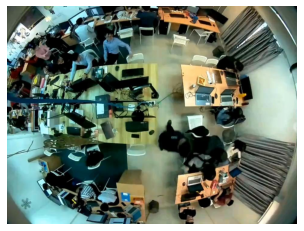

<Figure size 864x576 with 0 Axes>

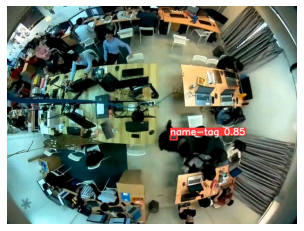

<Figure size 864x576 with 0 Axes>

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,8))
plt.show()

img = mpimg.imread(detect_image_path)
plt.imshow(img)
plt.axis('off') 
plt.figure(figsize=(12,8))
plt.show()


- actually is didnt label with annotation and is detect correct for this image

In [17]:
# Save the result to csv file
model50_predict_df.to_csv('model50ep_test_data_output.csv', index=True)
model100_predict_df.to_csv('model100ep_test_data_output.csv', index=True)

### Predict video sample

- will take longer if run without gpu, sample.mp4 with 53seconds take about 15 minutes to run

In [18]:
from ultralytics import YOLO
import pandas as pd

source = HOME + "\_GivenData\ori_data\sample.mp4"

results1 = model_50ep(source, save=True)

Results saved to runs\detect\predict


In [19]:
results1

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], size=(0, 6)),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], size=(0, 6)),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], size=(0, 6)),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], size=(0, 6)),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([0, 6])
 dtype: torch.float32
  + tensor([], size=(0, 6)),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'

In [20]:
# save each box xy coordinate & width,height tensor record
temp = [i.boxes.xywh for i in results1]

# save in dataframe
model50ep_video_df = pd.DataFrame(columns=["detect_boxes_values", "detect_name_tag_count"])
model50ep_video_df.index.name = "video_frame"

for i in temp:
    detect_boxes = i.cpu().numpy()
    detect_boxes_count = detect_boxes.shape[0]
    boxes_values = detect_boxes if detect_boxes_count != 0 else '-'
    model50ep_video_df = pd.concat([model50ep_video_df, pd.DataFrame({"detect_boxes_values": [boxes_values], "detect_name_tag_count": [detect_boxes_count]})], ignore_index=True)


In [21]:
model50ep_video_df

,detect_boxes_values,detect_name_tag_count
0,-,0
1,-,0
2,-,0
3,-,0
4,-,0
...,...,...
1336,-,0
1337,-,0
1338,-,0
1339,-,0


In [22]:
model50ep_video_df_detected = model50ep_video_df[model50ep_video_df.detect_name_tag_count>=1]
print(f"Total video frame: {len(model50ep_video_df)} Detected video frame: {len(model50ep_video_df_detected)} ")

Total video frame: 1341 Detected video frame: 293 


In [23]:
for index, row in model50ep_video_df_detected.iterrows():
    boxes_values = row['detect_boxes_values']
    name_tag_count = row['detect_name_tag_count']
    print(f"Video frame {index+1}: Total detected nametag = {name_tag_count}, Boxes xywh = {boxes_values}")

Video frame 320: Total detected nametag = 1, Boxes xywh = [[       98.5       461.5           7          13]]
Video frame 321: Total detected nametag = 1, Boxes xywh = [[        106         475           6          12]]
Video frame 323: Total detected nametag = 1, Boxes xywh = [[        106       482.5           6          11]]
Video frame 336: Total detected nametag = 1, Boxes xywh = [[      162.5         559           7          12]]
Video frame 337: Total detected nametag = 1, Boxes xywh = [[      174.5       564.5           7          13]]
Video frame 338: Total detected nametag = 1, Boxes xywh = [[        189         569           8          16]]
Video frame 339: Total detected nametag = 1, Boxes xywh = [[      202.5         575           9          16]]
Video frame 340: Total detected nametag = 1, Boxes xywh = [[      222.5         586          11          18]]
Video frame 341: Total detected nametag = 1, Boxes xywh = [[      239.5       591.5          11          17]]
Video fram

- xywh : x,y coordinate and width,height of drawn boxes

In [24]:
# Save the result to csv file
model50ep_video_df.to_csv('50epoch_video_total_output.csv', index=True)
model50ep_video_df_detected.to_csv('50epoch_video_detected_output.csv', index=True)

### Predict images sample

In [25]:
img_path = [ r"C:\Users\user10\Desktop\Staff_Attire_Detection\_GivenData\ori_data\Picture1.jpg",
             r"C:\Users\user10\Desktop\Staff_Attire_Detection\_GivenData\ori_data\Picture2.jpg",
             r"C:\Users\user10\Desktop\Staff_Attire_Detection\_GivenData\ori_data\Picture3.jpg" ]

In [26]:
# model = YOLO(best_model_path) # define above alrdy
temp_results = []
for i in img_path:
    temp_results.append(model_50ep.predict(source=i, conf=0.25, save=True))

Results saved to runs\detect\predict
Results saved to runs\detect\predict
Results saved to runs\detect\predict


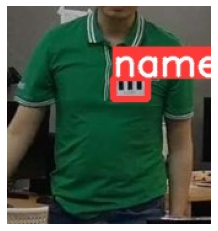

<Figure size 864x576 with 0 Axes>

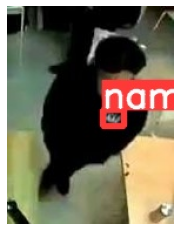

<Figure size 864x576 with 0 Axes>

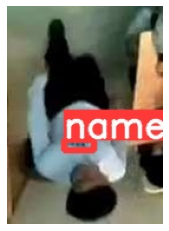

<Figure size 864x576 with 0 Axes>

In [29]:
img_result_path = [r"C:\Users\user10\Desktop\Staff_Attire_Detection\runs\detect\predict\Picture1.jpg",
                  r"C:\Users\user10\Desktop\Staff_Attire_Detection\runs\detect\predict\Picture2.jpg",
                  r"C:\Users\user10\Desktop\Staff_Attire_Detection\runs\detect\predict\Picture3.jpg"]



for i in img_result_path:
    img = mpimg.imread(i)
    plt.imshow(img)
    plt.axis('off') 
    plt.figure(figsize=(12,8))
    plt.show()

In [30]:
# Documentation - https://docs.ultralytics.com/modes/predict/#boxes

print(f'Boxes xyxy format : {temp_results[0][0].boxes.xyxy}')
print(f'Boxes confidence  : {temp_results[0][0].boxes.conf}')
print(f'Boxes class values: {temp_results[0][0].boxes.cls}')

Boxes xyxy format : tensor([[ 86.,  58., 114.,  75.]])
Boxes confidence  : tensor([0.76171])
Boxes class values: tensor([0.])


### Deploy model on Roboflow

In [ ]:
## Deploy with kaggle notebook
# project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME+kaggle_output_folder}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/qi-ming/staff-attire-identification/4  
<br>
Share your model with the world at: https://universe.roboflow.com/qi-ming/staff-attire-identification/model/4